# Contents
## 1 Getting insights of data:
### 1.1 General insights:
    - No of variables (rows) & observations (columns)
    - No of Categorical features
    - No of Numerical features
    - No of bool features
### 1.2 Problem specific insights:
    - Missing Value columns & its %, 
        - Stacked bar chart
        - Spectrum chart
    - Numerical variables 
        - Skewed data columns
        - high collinearity columns
    - Categorical Variables
        - high cardinality: 
            - no of distinct values, 
            - columns with all distinct values 
    - Imbalance dataset or not
        - bar graph – frequency %

In [69]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [61]:
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### 1.1 General insights:

    - No of variables (rows) & observations (columns)
    - No of Categorical features
    - No of Numerical features
    - No of bool features

In [3]:
# General insights of data
def eda_gen(dataframe):
    df = dataframe

    # No of Nows & Columns
    rows = df.shape[0]
    columns = df.shape[1]

    # Features count
    # No of Categorical features
    try:
        cate_features = df.dtypes.value_counts()[0]
    except:
        cate_features = 0
    # No of Numerical features
    try:
        num_features = df.dtypes.value_counts()[1]
    except:
        num_features = 0    
    # No of bool features    
    try:
        bool_features = df.dtypes.value_counts()[2]
    except:
        bool_features = 0    
    # '\033[4m' - underline, '\033[94m'- blue, "\033[0;0m"- end formating
    print('\033[4m' + '\033[94m'+ 'General insights:' + "\033[0;0m",
          '\nNo of rows :               ', rows,
          '\nNo of columns:             ',columns, 
          '\nNo of categorical features:', cate_features, 
          '\nNo of Numarical features:  ', num_features, 
          '\nNo of Boolean features:    ', bool_features)

In [4]:
eda_gen(df)

General insights: 
No of rows :                245725 
No of columns:              11 
No of categorical features: 7 
No of Numarical features:   4 
No of Boolean features:     0


### 1.2 Problem specific insights:
    1.2.1 - Missing Value columns & its %, 
            - Stacked bar chart
            - Spectrum chart

In [5]:
# Problem Specific insights of data
class eda_prob_spec:
    def __init__(self, dataframe):
        self.df = dataframe
    def missing_value_df(self):
        not_null_count = self.df.notnull().sum()
        null_count = self.df.isnull().sum()
        null_percentage = self.df.isnull().sum() * 100 / len(df)
        not_null_percentage = 100 - null_percentage
        missing_value_df = pd.DataFrame({'not_null_count': not_null_count,
                                         'null_count': null_count,
                                         'not_null_percent': not_null_percentage,
                                         'null_percent': null_percentage})
        missing_value_df.sort_values('null_percent', ascending=False, inplace=True)
        missing_value_df = missing_value_df[missing_value_df['null_count']>0]
        return(missing_value_df)
    def missing_value_plot(self):
        plt_df = self.missing_value_df()
        plt_df = plt_df.iloc[:,[2,3]]
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
        plt_bar = plt_df.plot(kind='bar', stacked=True, title='Skacked Bar Chart', 
                              ax=plt.subplot(2, 2, 1)) # subplot 2,2 is matrix size, 1 is position   
        plt_pie = plt_df.T.plot(kind='pie', subplots=True, autopct='%1.0f%%', ax=plt.subplot(2, 2, 3))   
        plt_msno = msno.matrix(self.df[plt_df.index], sparkline=False, ax=plt.subplot(2, 2, (2,4)))
        #return plt_bar, plt_pie, plt_msno

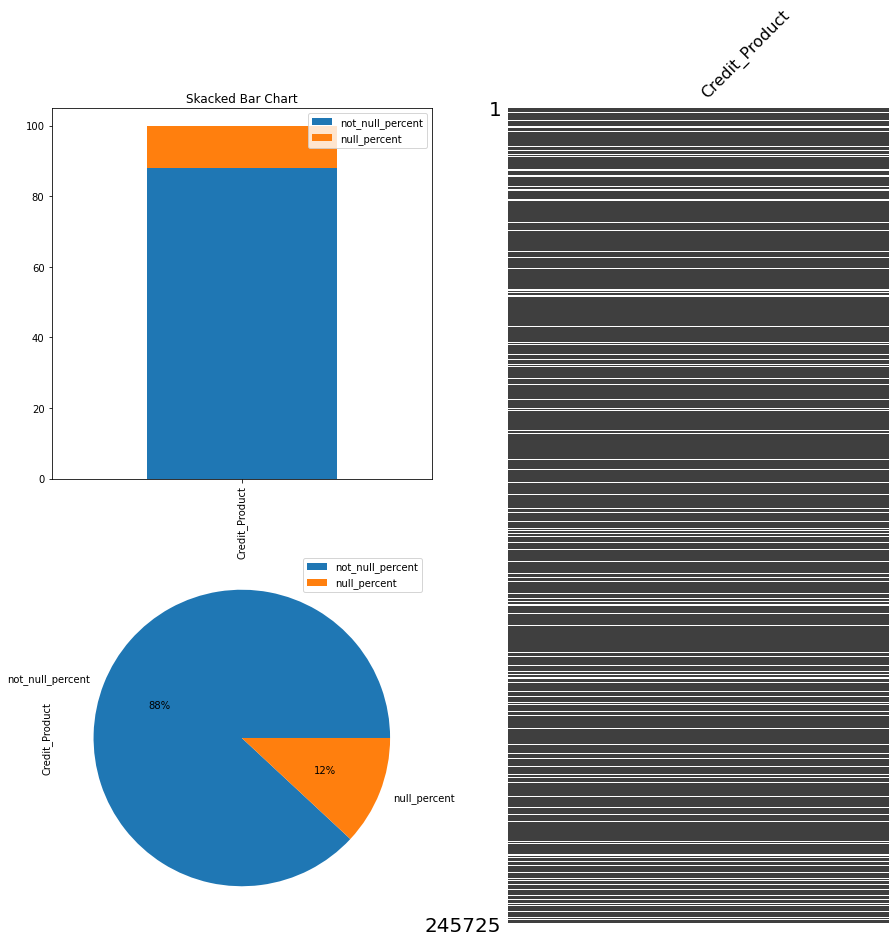

In [6]:
from IPython.core.interactiveshell import InteractiveShell # for printing all outputs in came cell
InteractiveShell.ast_node_interactivity = "all" #"last_expr"

df_null_stats = eda_prob_spec(df)
df_null_stats.missing_value_df()
df_null_stats.missing_value_plot()

    1.2.2 - Numerical variables 
            - Skewed data columns
            - high collinearity columns

#### Descriptive Statistics:
    - Mean, std, 
    - Variance, Skewness, Kurtosis, Coefficient of Variation
#### Quantile Statistics:
    - min, 25%, 50%, 75%, max

In [7]:
# Descriptive & Quantile Statistics:
def num_stats(dataframe):
    df = dataframe
    var = df.var(axis = 0, skipna = True)   
    skew = df.skew(axis = 0, skipna = True)
    kur = df.kurtosis(axis = 0, skipna = True)
    # Coefficient of Variation
    cv_func = lambda x: np.std(x, ddof=1) / np.mean(x)
    num_col = df.select_dtypes(include= np.number).columns
    cv = df.loc[:,num_col].apply(cv_func)

    # Quantile Statistics:
    desc = df.describe()
    num_stats = pd.DataFrame([var, cv, skew, kur], 
                             index=['Variance', 'coeff_variance', 'skew', 'kurtosis']).append(desc)
    return(num_stats)

In [8]:
num_stats = num_stats(df)
num_stats

,Age,Vintage,Avg_Account_Balance,Is_Lead
Variance,219.889507,1046.725390,7.275004e+11,0.180941
coeff_variance,0.338119,0.688964,7.558791e-01,1.793242
skew,0.618992,0.790189,2.968727e+00,1.235596
kurtosis,-0.441273,-0.696540,1.430459e+01,-0.473307
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000


##### Skewness in the Data
    - data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7
    - Highly Skewed - less than -1 or greater than 1
    - moderately Skewed - between -1 and – 0.5 or between 0.5 and 1
    - Not Skewed - between -0.5 and 0.5

In [9]:
# Skewed data columns:
def skew_col(dataframe):
    df = dataframe
    skew_df = df.skew(axis = 0, skipna = True)
    skew_col = skew_df[(skew_df<.5) | (skew_df>.5)]
    return skew_col

In [10]:
skew_col(df)

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

#### Treatment of skewness in data
    - what is skewness. When skewness in data is a problem
    - which type of algorithms will have impact of skewed data & why
    - which type of algorithms will not have impact of skewed data & why
    - Treatment for skewness:
        - Applying log / sqrt/ sq / inverse / exponential to the data
    - will skewness have impact after normalizing or standardising the data
    - can we completly remove skewness after applying transformation? 
    - upto what extent we can remove skewness
    - when normalising or standardsing data is good, before or after applying tranformations to remove skewness
    - when we can consider deleting the outliers

In [126]:
# Skewness & outliers representation plots
import statsmodels.api as sm
import pylab as py

def skew_plots(dataframe, column_name):
    df = dataframe
    df_col = str(column_name)
    if isinstance(df, pd.DataFrame):
        data = df[df_col]
    else:
        data = df
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
    # KDE Plot 
    kde_plt = sns.histplot(data=data, kde=True, ax=ax[0])
    # Normal Q-Q Plot
    qqplot = sm.qqplot(data=data, line ='45', ax=ax[1])
    #py.show()
    # Box plot
    box_plt = ax[2].boxplot(x=data)
    #plt.show()
    #return kde_plt, qqplot, box_plt

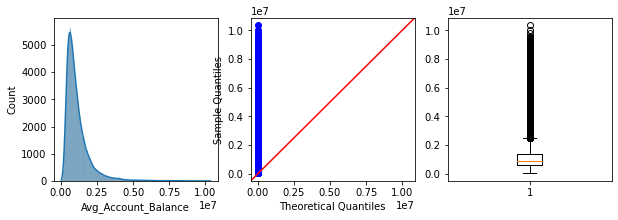

In [127]:
skew_plots(df,'Avg_Account_Balance')

In [128]:
# Transformation functions to visuvalize which function reduces skewness
def skew_trans_plots(dataframe, column_name):
    df = dataframe
    df_col = str(column_name)
    trans_fun = {'Square' : np.square(df[df_col]), 
                 'Square Root' : np.sqrt(df[df_col]), 
                 'Log' : np.log(df[df_col]), 
                 'reciprocal' : np.reciprocal(df[df_col]), 
                 'Power' : np.power(df[df_col],5), 
                 'Box Cox' : stats.boxcox(df[df_col])[0]}
    for i in trans_fun:
        trans_df = trans_fun[i]
        print(i)
        skew_trans_plots = skew_plots(trans_df, df_col)
        plt.show()
    return skew_trans_plots

Square


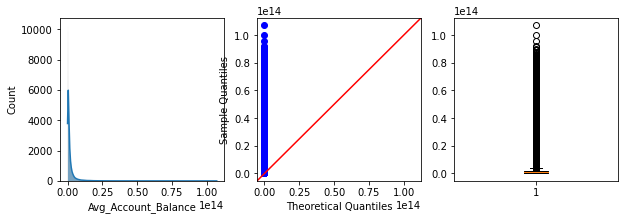

Square Root


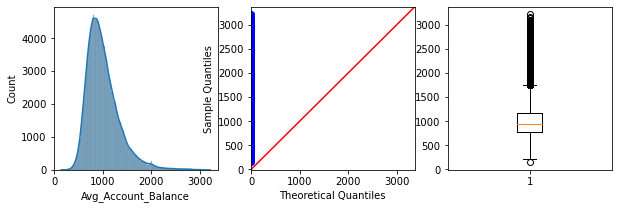

Log


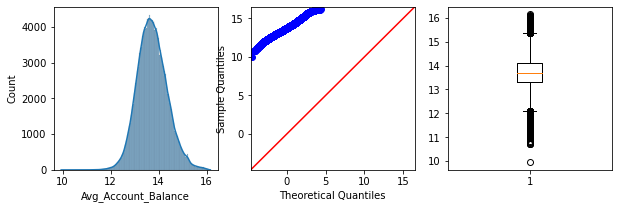

reciprocal


C:\Users\eswar\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


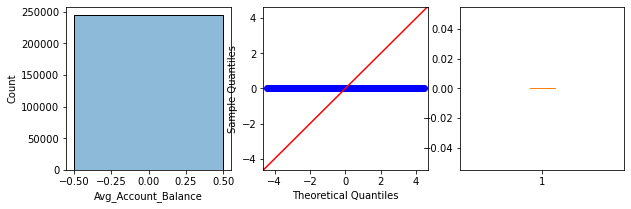

Power


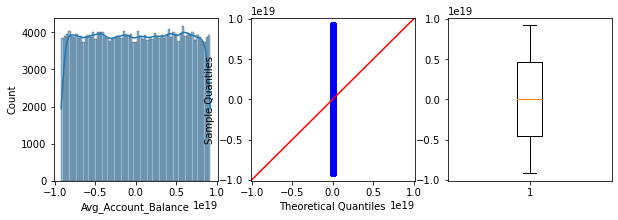

Box Cox


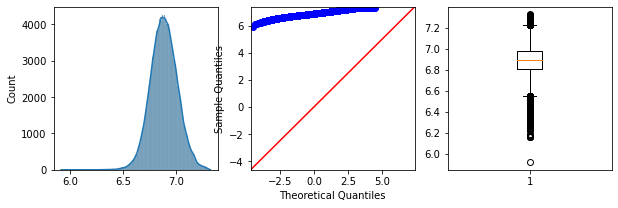

In [129]:
skew_trans_plots(df,'Avg_Account_Balance')


    1.2.3 - Categorical Variables
            - high cardinality: 
                - no of distinct values, 
                - columns with all distinct values 
    1.2.4 - Imbalance dataset or not
            - bar graph – frequency %

In [ ]:
# Check whether all Dtypes are proper or not, else convert to relevent datatype
df.info()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize= (10,10), diagonal='kde', color = 'b') # kde - kernel density estimate
plt.show()

In [ ]:
df['Gender'].value_counts().plot.bar()

In [ ]:
df['Gender'].value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = df['Gender']
wordcloud = WordCloud().generate(' '.join(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Distinct Count
dist_cnt = len(df['Gender'].unique())
dist_cnt

In [ ]:
# Unique %
dist_per = round(dist_cnt/len(df['Gender']),1)
dist_per

In [ ]:
# high cardinality
if (dist_per > 60):
    print('high cardinality:', dist_cnt,'distinct values')
else:
    print('low cardinality:', dist_cnt,'distinct values')

In [ ]:
# has all distinct values
if dist_per == 100:
    print('has all distinct values')

In [ ]:
# KDE Plot
sns.histplot(data=df, x="Age", kde=True)

In [ ]:
# Normal Q-Q Plot
import statsmodels.api as sm
import pylab as py
qqplot = sm.qqplot(df.Age, line ='45')
py.show()

In [ ]:
df.Age.plot.box()

In [ ]:
# Correlations - Heat Maps (Pearson, Spearnman, KendallTau)
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
# Missing Values - Dendogram


In [ ]:
# Imbalance dataset or not
imb_df = df['Is_Lead'].value_counts()*100/len(df)
imb_diff = abs(int(imb_df.diff()[1]))
if imb_diff > 50:
    print('Imblanced Dataset')
else:
    print('Not an Imblanced Dataset')
    
plt1 = plt.subplot(1, 2, 1)    
ax1 = imb_df.plot.bar()

plt2 = plt.subplot(1, 2, 2)
ax2 = imb_df.plot.pie(autopct='%1.0f%%')